Discard: Tests with using wavelets as basis for image generation

In [1]:
import pywt
import astropy

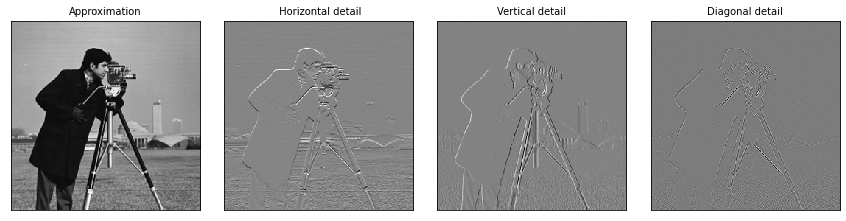

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [223]:
w = 'sym4'
c = pywt.wavedec2(original, w, level=5)
print(c[0].shape)
d = []
d += [c[0]*0]
for i in range(1, len(c)):
    print(c[i][0].shape)
    r1 = np.random.randn(*(c[i][0].shape))/i**1
    r2 = np.random.randn(*(c[i][0].shape))/i**1
    r3 = np.random.randn(*(c[i][0].shape))/i**1
    d += [[r1, r2, r3]]
#r = np.random.randn(10, 10)
#b = r
#c = [r*0, [b, b*0, b*0]]

(22, 22)
(22, 22)
(38, 38)
(70, 70)
(133, 133)
(259, 259)


(512, 512)


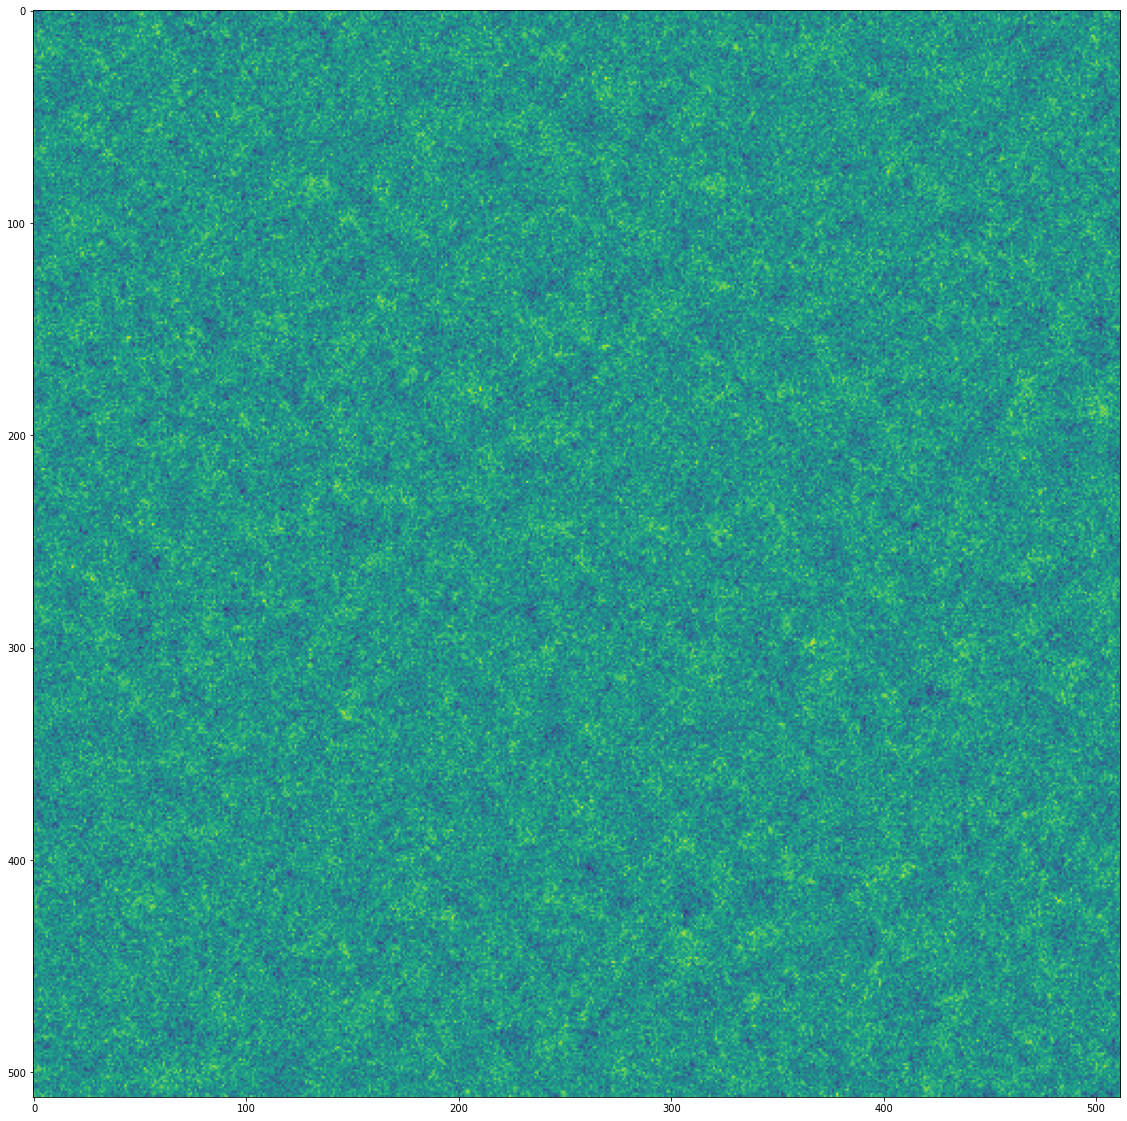

In [224]:
img = pywt.waverec2(d, w)
plt.figure(figsize=(20, 20))
plt.imshow(img)
print(img.shape)

## Convolution image generator with RickerWavelet

In [408]:
from astropy import convolution as ac
import numpy as np
import pylab as plt

In [443]:
def convolve(coef, size):
    img = np.zeros(size)
    for c in coef:
        k = len(c)
        n = len(img)
        base = np.zeros_like(img)
        base[int(n/k/2)::int(n/k), int(n/k/2)::int(n/k)] = c*(n/k)**5
        kernel = ac.RickerWavelet2DKernel(1.8*n/k)
        base = ac.convolve_fft(base, kernel, normalize_kernel = False)
        img += base
    return img

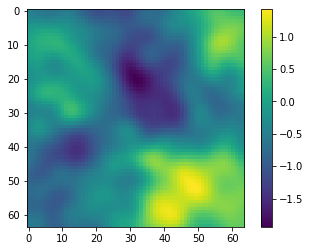

In [494]:
for i in range(10):
    coef = [np.random.randn(k, k) for k in [4, 8, 16, 32]]
    img = convolve(coef, (64, 64))
#img = np.exp(img)
plt.imshow(img)
plt.colorbar()

In [451]:
import torch

In [488]:
red2 = torch.nn.AvgPool2d(2)

In [493]:
# 2n x 2n image --> n x n estimates
l = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, 3, padding = 1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 64, 3, padding = 1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(64, 64, 3, padding = 1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64, 1, 3, padding = 1),
)

In [491]:
x = torch.zeros(1, 1, 64, 64)
x = red2(x)
l(x).shape

torch.Size([1, 1, 16, 16])